In [1]:
import matplotlib as mpl

fsize = 11
textwidth = 6.47
mpl.rcParams['legend.fontsize'] = fsize
mpl.rcParams["figure.figsize"] = (textwidth,(textwidth*9)/16)
mpl.rcParams['axes.labelsize'] = fsize
mpl.rcParams['xtick.labelsize'] = fsize
mpl.rcParams['ytick.labelsize'] = fsize
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['mathtext.fontset'] = 'dejavusans'
mpl.rcParams.update({'font.size': fsize})

import matplotlib.pyplot as plt
import numpy as np
import json

[-10.    -9.99  -9.98 ...  89.97  89.98  89.99]
0.48
0.304
0.176


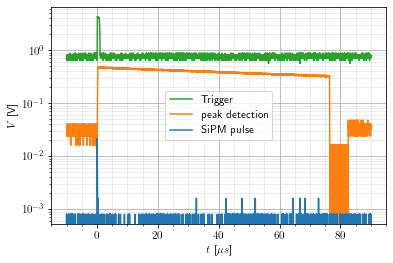

In [14]:
data_folder = "pd-speed/"

data = np.genfromtxt('../data/'+data_folder+'tek0004ALL.csv', dtype="f8,f8,f8,f8", names=["t", "pd", "pm", "tg"], usecols=[0,1,2,3], skip_header=21, delimiter=",").T

data["t"] = (data["t"]*1e6) #us

print(data["t"] )

fig, ax = plt.subplots()

ax.plot(data["t"], data["tg"], label="Trigger", alpha=1, color="tab:green")
ax.plot(data["t"], data["pd"], label="peak detection", color="tab:orange")
ax.plot(data["t"], data["pm"], label="SiPM pulse", color="tab:blue")
ax.set_yscale(value="log")

ax.set_xticks(np.arange(-20, 100, 5), minor=True)
ax.grid(which="both", axis="both")
ax.grid(which='minor', axis='both', alpha=0.3)

ax.set_xlim(left=-15, right=95)

ax.legend()

v1 = data["pd"][data["t"]==0.42][0]
v2 = data["pd"][data["t"]==76.41][0]
print(v1)
print(v2)
print(v1-v2)

#ax.axvline(x=0.42)
#ax.axvline(x=76.41)

ax.set_ylabel(r"$V$ [V]")
ax.set_xlabel(r"$t$ [$\mu s$]")
#plt.ticklabel_format(axis="x", style="plain")

plt.savefig("../figures/"+data_folder+"Trigger_reset.pdf", bbox_inches='tight')